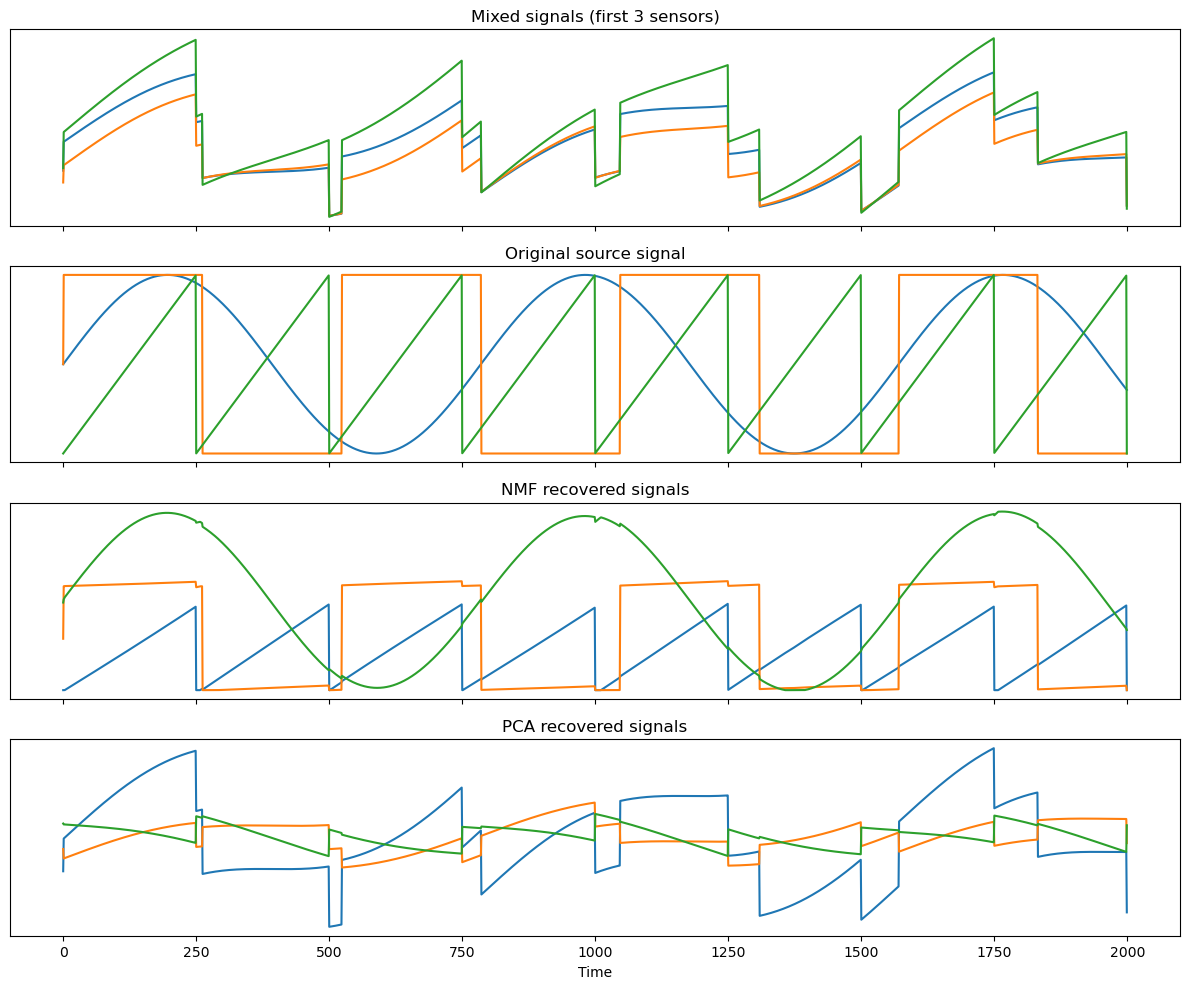

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, PCA

# Step 1: Create time steps and 3 original source signals
time = np.linspace(0, 8, 2000)
s1 = np.sin(2 * time)            # Sinusiodal signal
s2 = np.sign(np.sin(3 * time))   # Square wave
s3 = 2 * (time % 1) - 1          # sawtooth wave

# Stack signals into a matrix (2000 samples, 3 signals)
S = np.c_[s1, s2, s3]

# Normalize signals to be non-negative for NMF
S -= S.min(axis=0)

# Step 2: Mix Signals using a random matrix A
rng = np.random.RandomState(0)
A = rng.uniform(size=(100, 3))     # Mixing matrix (100 sensors, 3 signals)
X = np.dot(S, A.T)                 # Mixed signal (2000 samples, 100 singals)

# Step 3: Recover signals using NMF
nmf = NMF(n_components = 3, random_state = 42)
S_nmf = nmf.fit_transform(X)

# Step 4: Recover signals using PCA
pca = PCA(n_components = 3)
S_pca = pca.fit_transform(X)

# Step 5: Plot original, mixed, NMF, and PCA signals
models = [X[:, :3], S, S_nmf, S_pca]
titles = ['Mixed signals (first 3 sensors)', 'Original source signal', 'NMF recovered signals', 'PCA recovered signals']

fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

for ax, model, title in zip(axes, models, titles):
    ax.plot(model)
    ax.set_title(title)
    ax.set_yticks([])

plt.xlabel("Time")
plt.tight_layout()
plt.show()




